In [ ]:
pip install torch torchvision matplotlib numpy pandas

In [2]:
import cv2
from skimage.feature import hog
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from skimage import feature, exposure
import imutils
from imutils import paths
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [9]:


# Create an MLP model within a pipeline that also includes scaling
model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300))


In [10]:
import cv2
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Function to load images and extract HOG features
def load_and_extract_features(directory):
    images = []
    labels = []
    for imagePath in paths.list_images(directory):
        car_model = imagePath.split('\\')[-1]
        car_model = car_model.split('_')[0]
        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        logo = cv2.resize(gray, (200, 100))  # Resizing to a fixed size

        # Extract HOG features
        H = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
        images.append(H)
        labels.append(car_model)
    return images, labels

# Hardcoded paths
training_path = r"C:\Users\Ranadeep Mahendra\OneDrive\Desktop\Cv Project\Carsdataset\train1"
testing_path = r"C:\Users\Ranadeep Mahendra\OneDrive\Desktop\Cv Project\Carsdataset\test1"

# Load and prepare data
X_train, y_train = load_and_extract_features(training_path)
X_test, y_test = load_and_extract_features(testing_path)

# Create an MLP model within a pipeline that also includes scaling
model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300))
model.fit(X_train, y_train)

# Testing the model
for i, H in enumerate(X_test):
    pred = model.predict([H])[0]
    print(f"Image #{i+1}: Predicted Label: {pred}")

# Note: Visualization code remains the same as you had for displaying HOG images and predictions


Image #1: Predicted Label: Hyundai
Image #2: Predicted Label: Audi
Image #3: Predicted Label: Hundai
Image #4: Predicted Label: Hyundai
Image #5: Predicted Label: Hyundai
Image #6: Predicted Label: Mahindra
Image #7: Predicted Label: Hyundai
Image #8: Predicted Label: Lexus
Image #9: Predicted Label: Tatasafari
Image #10: Predicted Label: RollsRoyce
Image #11: Predicted Label: Mazda
Image #12: Predicted Label: Mercedes
Image #13: Predicted Label: RollsRoyce
Image #14: Predicted Label: Mahindra
Image #15: Predicted Label: Skoda
Image #16: Predicted Label: Tatasafari
Image #17: Predicted Label: Hyundai
Image #18: Predicted Label: Toyata
Image #19: Predicted Label: Tatasafari
Image #20: Predicted Label: Tatasafari
Image #21: Predicted Label: Volkswagen


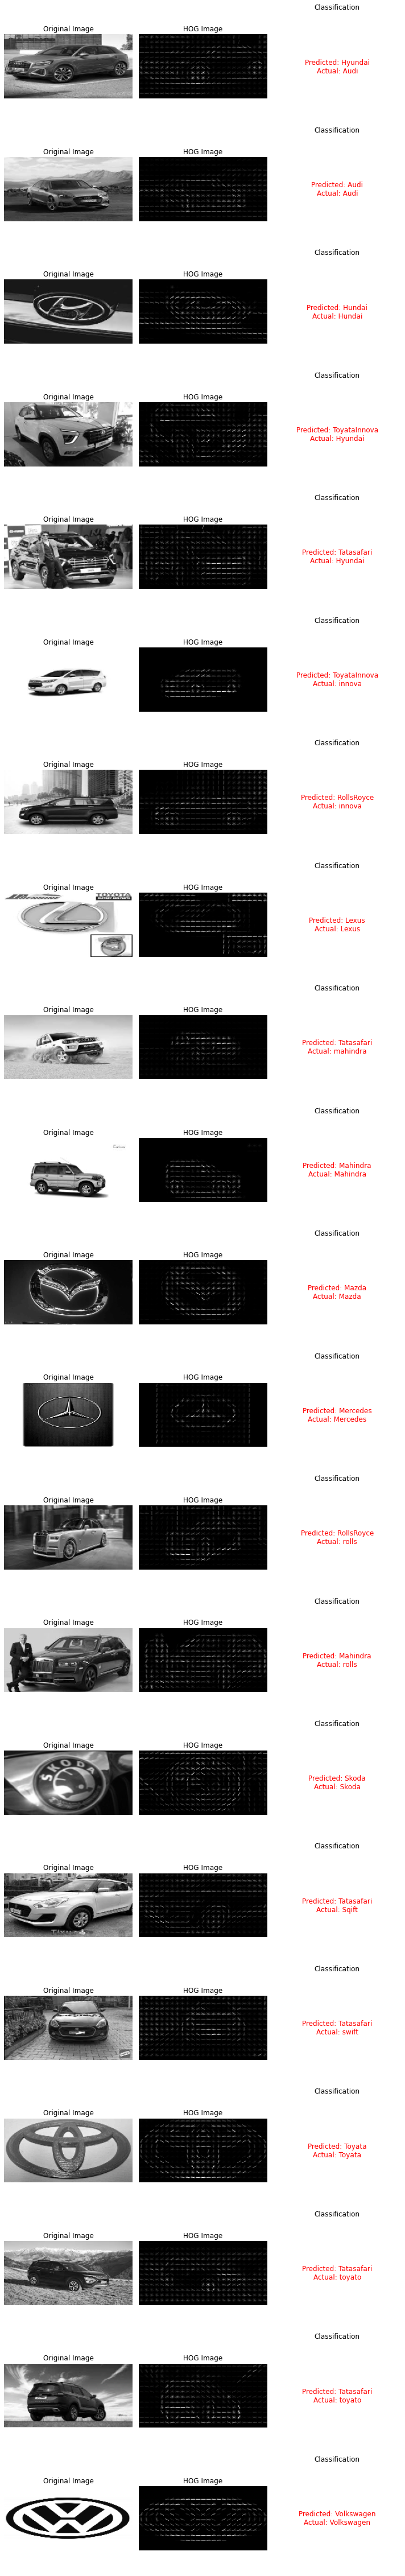

In [11]:
import cv2
import numpy as np
from skimage import feature, exposure
import imutils
from imutils import paths
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def load_and_extract_features(directory, visualize=False):
    images = []
    labels = []
    original_images = []
    hog_images = []  # To store HOG visualizations if needed

    for imagePath in paths.list_images(directory):
        car_model = imagePath.split('\\')[-1].split('_')[0]
        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        logo = cv2.resize(gray, (200, 100))

        # Extract HOG features and conditionally visualize
        if visualize:
            H, hog_image = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8),
                                       cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys',
                                       visualize=visualize)
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
            hog_images.append(hog_image_rescaled)
        else:
            H = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')

        images.append(H)
        labels.append(car_model)
        original_images.append(logo)

    return images, labels, original_images, hog_images

# Set paths
training_path =  r"C:\Users\Ranadeep Mahendra\OneDrive\Desktop\Cv Project\Carsdataset\train1"
testing_path = r"C:\Users\Ranadeep Mahendra\OneDrive\Desktop\Cv Project\Carsdataset\test1"

# Load and prepare data with visualization
X_train, y_train, _, _ = load_and_extract_features(training_path)
X_test, y_test, original_test_images, test_hog_images = load_and_extract_features(testing_path, visualize=True)

# Create an MLP model within a pipeline that also includes scaling
model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300))
model.fit(X_train, y_train)

# Testing the model and collect predictions
predictions = [model.predict([H])[0] for H in X_test]

# Visualization function
def visualize_classification(images, hog_images, labels, predictions):
    fig, axes = plt.subplots(len(images), 3, figsize=(10, len(images) * 3))
    for i, (image, hog_image, label, prediction) in enumerate(zip(images, hog_images, labels, predictions)):
        axes[i, 0].imshow(image, cmap='gray')
        axes[i, 0].set_title('Original Image')
        axes[i, 1].imshow(hog_image, cmap='gray')
        axes[i, 1].set_title('HOG Image')
        axes[i, 2].text(0.5, 0.5, f'Predicted: {prediction}\nActual: {label}', horizontalalignment='center',
                        verticalalignment='center', fontsize=12, color='red')
        axes[i, 2].set_title('Classification')
        for ax in axes[i]:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize results
visualize_classification(original_test_images, test_hog_images, y_test, predictions)
